Top 10 Strongest Pokemon by TotalStats

In [ ]:
SELECT Name, Type_1, Type_2, Total
FROM pokemon
ORDER BY Total DESC
LIMIT 10;

![image](https://github.com/cdayao93/SQL-Pokemon-Data/assets/147434719/fb6ffabb-a68a-4ea4-8c45-443b0fc73680)


Distribution of Pokemon Types- This query creates a subquery that selects all types(both Type1 and Type2 from the dataset, counting them separately while considering 
Type 2 only if it is not null to avoid including Pokemon without a secondary type.Then, in the outer query, it sums these counts for each type across both Type_1 and Type_2, giving a total count of Pokémon for each type, which accurately reflects the distribution of types without duplicates
    

In [ ]:
SELECT Type, SUM(Count) AS TotalCount
FROM (
  SELECT Type_1 AS Type, COUNT(*) AS Count
  FROM pokemon
  GROUP BY Type_1
  UNION ALL
  SELECT Type_2, COUNT(*)
  FROM pokemon
  WHERE Type_2 IS NOT NULL
  GROUP BY Type_2
) AS CombinedTypes
GROUP BY Type
ORDER BY TotalCount DESC;

![image](https://github.com/cdayao93/SQL-Pokemon-Data/assets/147434719/1527d094-e1ee-448d-b48b-52a89bb9a250)
![image](https://github.com/cdayao93/SQL-Pokemon-Data/assets/147434719/fcc41a3c-3766-4b6f-a62b-b159661088ff)

Most Common Type of Pokemon( I guess cause the ocean is huge)

In [ ]:
SELECT Type_1, COUNT(*) AS Count
FROM pokemon
GROUP BY Type_1
UNION
SELECT Type_2, COUNT(*)
FROM pokemon
WHERE Type_2 IS NOT NULL
GROUP BY Type_2
ORDER BY Count DESC
LIMIT 1;

![image](https://github.com/cdayao93/SQL-Pokemon-Data/assets/147434719/cf3001bf-ecbb-42e4-9750-6706b1b2c24a)

Average Stats For Each Tupe (Type1)

In [ ]:
SELECT Type_1, AVG(Total) AS AvgTotal, AVG(HP) AS AvgHP, AVG(Attack) AS AvgAttack, AVG(Defense) AS AvgDefense, AVG(Sp_Atk) AS AvgSpAtk, AVG(Sp_Def) AS AvgSpDef, AVG(Speed) AS AvgSpeed
FROM pokemon
GROUP BY Type_1
ORDER BY AvgTotal DESC;

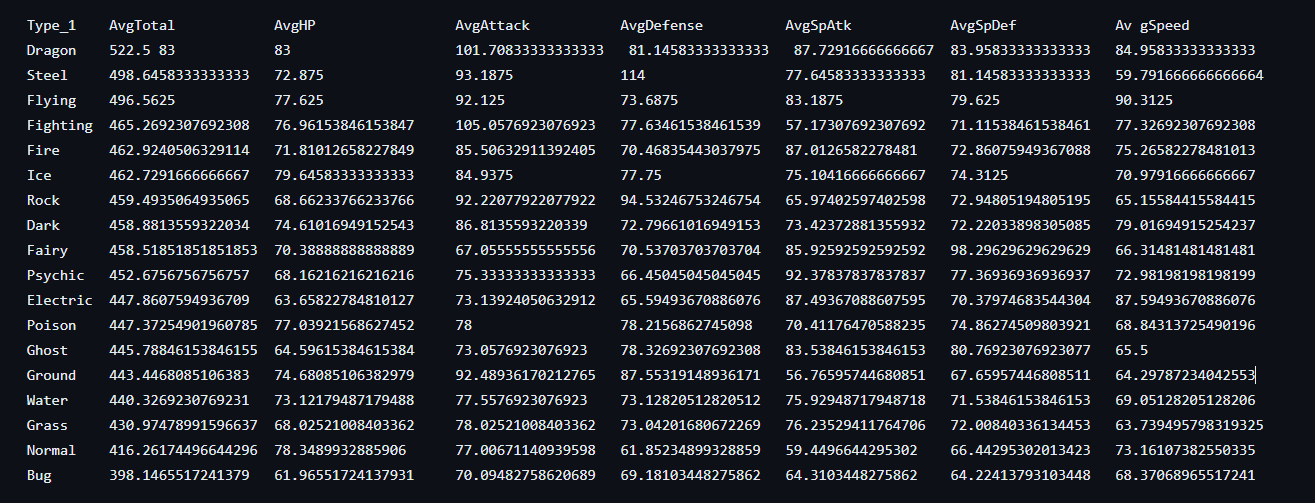

AVG Stats Across All Generations(Gen 6 has a few bangers in there)

In [ ]:
SELECT Generation, AVG(Total) AS AvgTotal, AVG(HP) AS AvgHP, AVG(Attack) AS AvgAttack, AVG(Defense) AS AvgDefense, AVG(Sp_Atk) AS AvgSpAtk, AVG(Sp_Def) AS AvgSpDef, AVG(Speed) AS AvgSpeed
FROM pokemon
GROUP BY Generation
ORDER BY Generation;

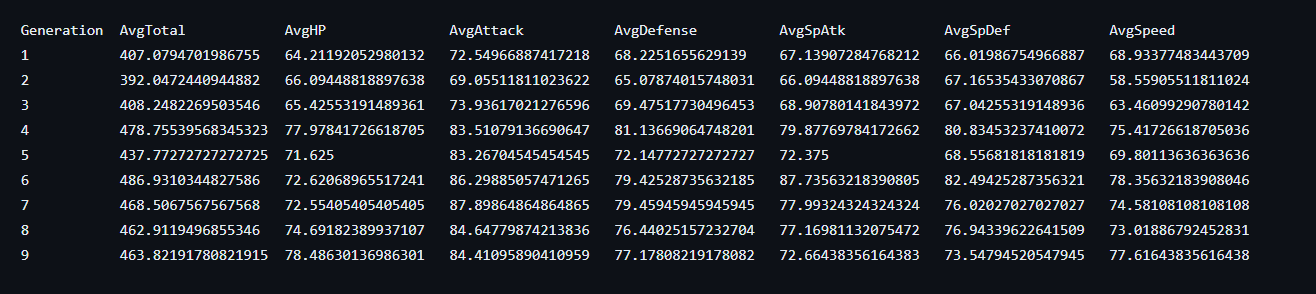

Comparison on Mega Pokemon(Mewtwo and Rayquaza are GOATED)

In [ ]:
SELECT Name, Type_1, Type_2, Total, HP, Attack, Defense, Sp_Atk, Sp_Def, Speed
FROM pokemon
WHERE Name LIKE 'Mega_%'
OR Name IN (SELECT Name FROM pokemon WHERE Name NOT LIKE 'Mega_%' AND Name IN (SELECT Name FROM pokemon WHERE Name LIKE 'Mega_%'));

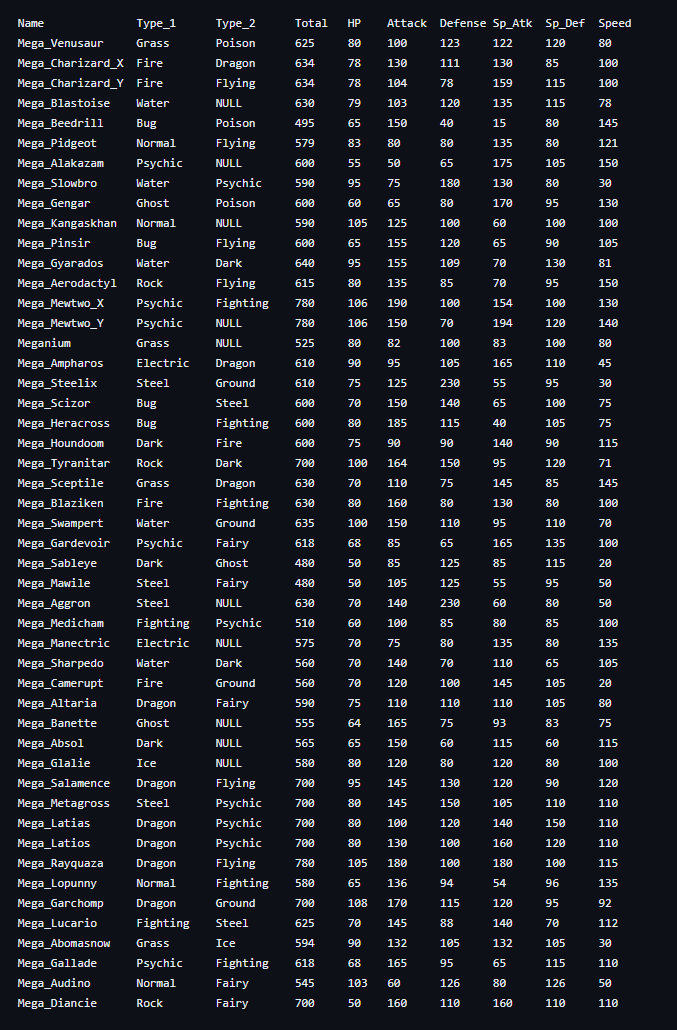